In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/Othercomputers/My Laptop'

/content/drive/Othercomputers/My Laptop


In [3]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [4]:
# Constant for image processing
IMAGES_SIZE = 256
BATCH_SIZE = 64

In [5]:
# Load datasets from directories
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Othercomputers/My Laptop/NewDataset2/train',
    shuffle=True,
    image_size=(IMAGES_SIZE, IMAGES_SIZE),
    batch_size=BATCH_SIZE
)


Found 16504 files belonging to 15 classes.


In [6]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Othercomputers/My Laptop/NewDataset2/test',
    shuffle=False,  # No need to shuffle the test set
    image_size=(IMAGES_SIZE, IMAGES_SIZE),
    batch_size=BATCH_SIZE
)

Found 2064 files belonging to 15 classes.


In [7]:
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Othercomputers/My Laptop/NewDataset2/validation',
    shuffle=False,  # No need to shuffle the validation set
    image_size=(IMAGES_SIZE, IMAGES_SIZE),
    batch_size=BATCH_SIZE
)

Found 2070 files belonging to 15 classes.


In [8]:
# Display class names in the dataset
class_names = train_dataset.class_names
class_names

['Pepper Bell Bacterial Spot',
 'Pepper Bell Healthy',
 'Potato Early Blight',
 'Potato Healthy',
 'Potato Late Blight',
 'Tomato Bacterial Spot',
 'Tomato Early Blight',
 'Tomato Healthy',
 'Tomato Late Blight',
 'Tomato Leaf Mold',
 'Tomato Mosaic Virus',
 'Tomato Septoria Leaf Spot',
 'Tomato Spider Mites Two Spotted Spider Mite',
 'Tomato Target Spot',
 'Tomato Yellow Leaf Curl Virus']

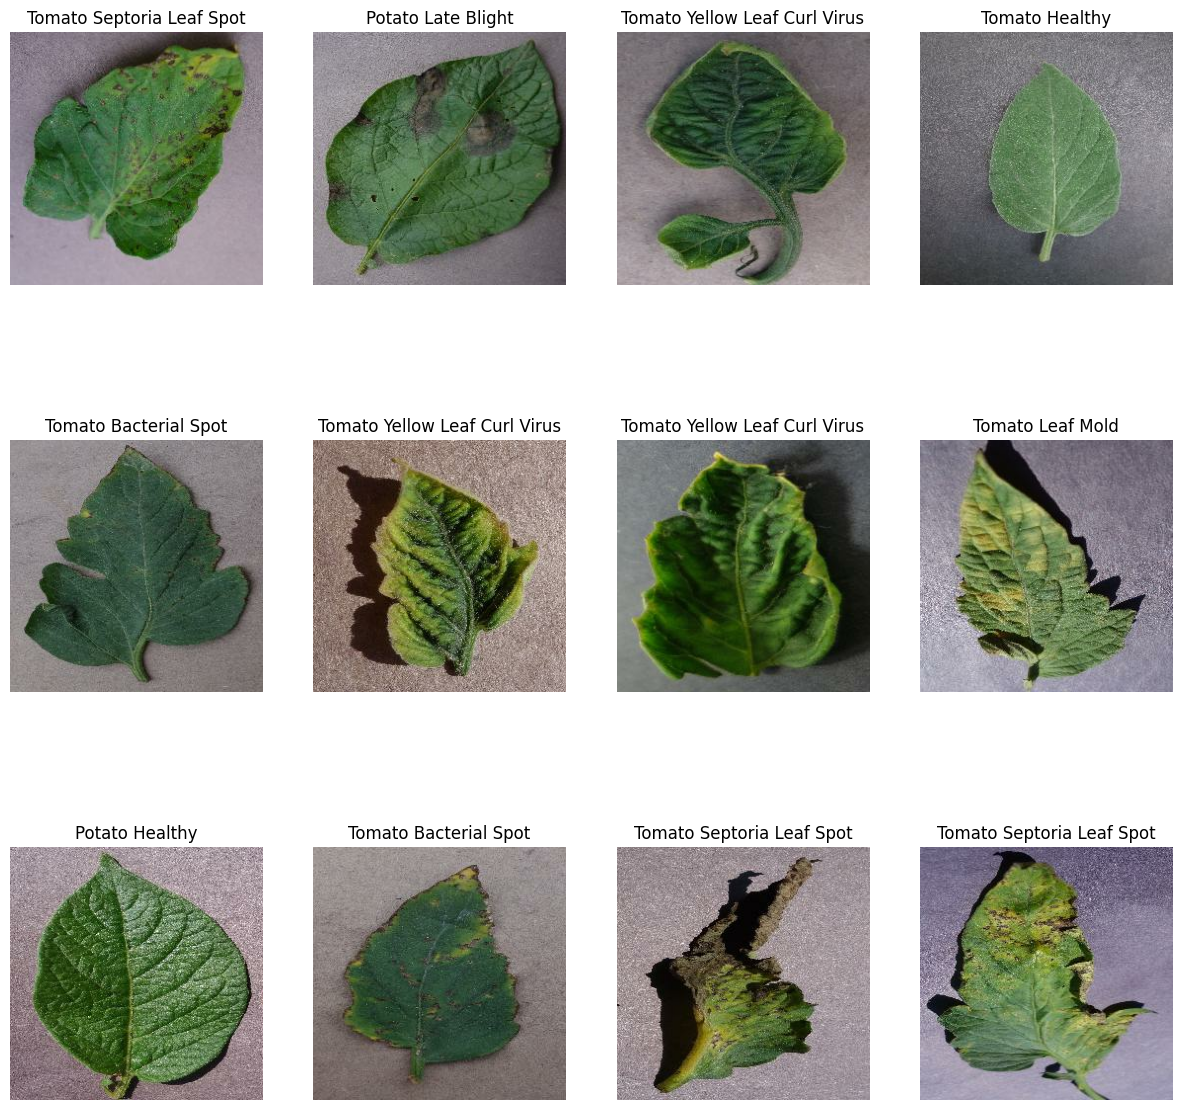

In [9]:
# Display images from the dataset
plt.figure(figsize=(15, 15))
for image_batch, label_batch in train_dataset.take(1):
    for i in range(12):
      ax = plt.subplot(3, 4, i + 1)
      plt.imshow(image_batch[i].numpy().astype('uint8'))
      plt.title(class_names[label_batch[i]])
      plt.axis('off')

In [10]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGES_SIZE, IMAGES_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [12]:
# Build the model
input_shape = (None, IMAGES_SIZE, IMAGES_SIZE, 3)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, 3, activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                 

In [14]:
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.96
)

In [15]:
# Create an optimizer with the scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [16]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [17]:
# Define a learning rate schedule callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: learning_rate(epoch))

In [18]:
EPOCHS = 40
history = model.fit(
    train_dataset,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = valid_dataset,
    callbacks = [lr_schedule]
)

Epoch 1/40
258/258 [==============================] - 1253s 5s/step - loss: 2.4207 - accuracy: 0.2159 - val_loss: 2.0988 - val_accuracy: 0.3401 - lr: 1.0000e-04
Epoch 2/40
258/258 [==============================] - 32s 121ms/step - loss: 1.8651 - accuracy: 0.4161 - val_loss: 1.8677 - val_accuracy: 0.4101 - lr: 9.9996e-05
Epoch 3/40
258/258 [==============================] - 32s 122ms/step - loss: 1.5328 - accuracy: 0.5095 - val_loss: 1.7594 - val_accuracy: 0.4483 - lr: 9.9992e-05
Epoch 4/40
258/258 [==============================] - 33s 123ms/step - loss: 1.3061 - accuracy: 0.5722 - val_loss: 1.5442 - val_accuracy: 0.5164 - lr: 9.9988e-05
Epoch 5/40
258/258 [==============================] - 33s 124ms/step - loss: 1.1256 - accuracy: 0.6299 - val_loss: 1.7620 - val_accuracy: 0.4787 - lr: 9.9984e-05
Epoch 6/40
258/258 [==============================] - 33s 124ms/step - loss: 0.9953 - accuracy: 0.6712 - val_loss: 1.2306 - val_accuracy: 0.6058 - lr: 9.9980e-05
Epoch 7/40
258/258 [=========

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy}')

33/33 [==============================] - 146s 4s/step - loss: 0.6124 - accuracy: 0.8130
Test Accuracy: 0.8129844665527344


In [20]:
# Calculate additional metrics
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

33/33 [==============================] - 3s 96ms/step


In [21]:
# Calculate accuracy rate
accuracy_rate = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy Rate: {accuracy_rate}')

Accuracy Rate: 0.812984496124031


In [22]:
# Calculate error rate
error_rate = 1 - accuracy_rate
print(f'Error Rate: {error_rate}')

Error Rate: 0.187015503875969


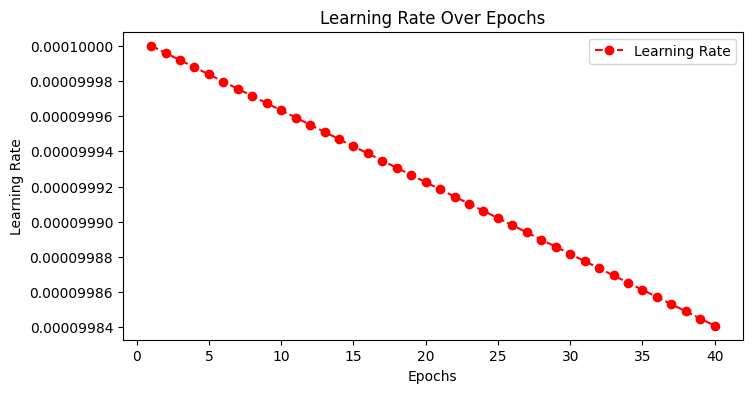

In [23]:
# Access the learning rate during training
learning_rates = history.history['lr']
epochs_range = range(1, EPOCHS + 1)
# Plot learning rates
plt.figure(figsize=(8, 4))
plt.plot(epochs_range, learning_rates, label='Learning Rate', marker='o', linestyle='--', color='r')
plt.title('Learning Rate Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import precision_score

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')
print(f'Precision: {precision}')

Precision: 0.8305682764864095


In [25]:
# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')
print(f'Recall: {recall}')

Recall: 0.812984496124031


In [26]:
from sklearn.metrics import f1_score

f1 = f1_score(true_labels, predicted_labels, average = 'weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.8140576524808774


In [27]:
# Display confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 57   2   1   0   1   0  11   0   2   1   0  14   1   9   1]
 [  0 140   0   4   0   0   0   1   0   0   0   0   0   2   1]
 [  0   1  95   0   0   0   1   2   0   0   0   0   0   1   0]
 [  0   1   0  11   0   0   0   2   0   0   0   0   0   1   0]
 [  0   0   2   2  75   0  10   3   4   0   0   1   2   1   0]
 [  1   1   0   0   4 179  11   0   3   0   0   1   3   4   6]
 [  2   1   1   0   0   2  80   1   5   0   0   1   3   4   0]
 [  0   0   0   0   0   0   0 159   0   0   0   0   0   0   0]
 [  0   3   5   0  26   4  21   0 125   1   0   3   2   0   1]
 [  2   0   0   0   0   0   1   0   6  66   1  10   7   1   1]
 [  0   0   0   0   0   0   0   0   0   0  36   0   0   1   0]
 [  3   5   3   0   2   1  15   0   6   1   2 132   0   7   0]
 [  0   0   0   0   0   0   6  18   0   0   2   0 118  24   0]
 [  0   2   0   0   0   1   2  31   0   0   0   0   3 101   0]
 [  0   0   0   0   0   0   1   0   1   0   1   0  13   1 304]]


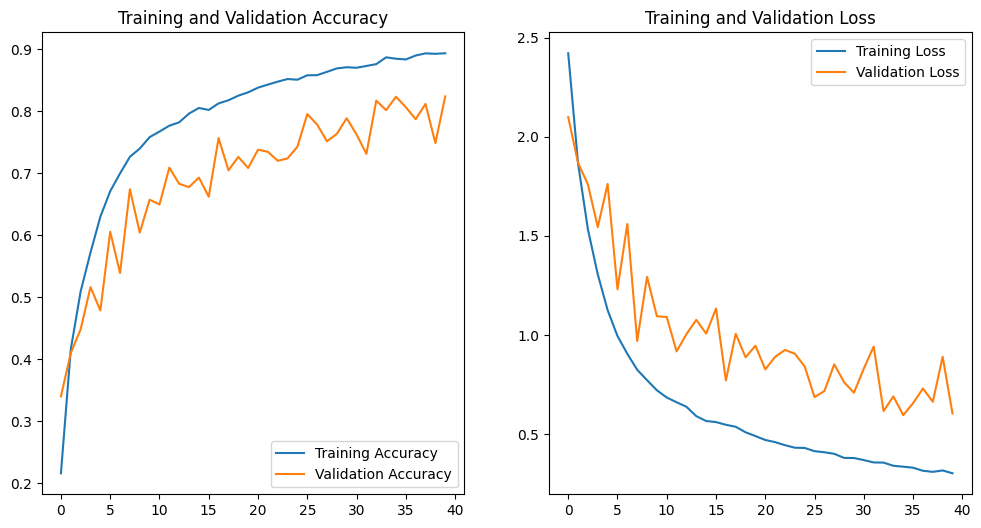

In [28]:
# Plot training and validation curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
model.save("/content/drive/Othercomputers/My Laptop/NewDataset2/CNN(Model1).h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


first image prediction
actual label: Pepper Bell Bacterial Spot
2/2 [==============================] - 1s 11ms/step
predicted label: Tomato Septoria Leaf Spot


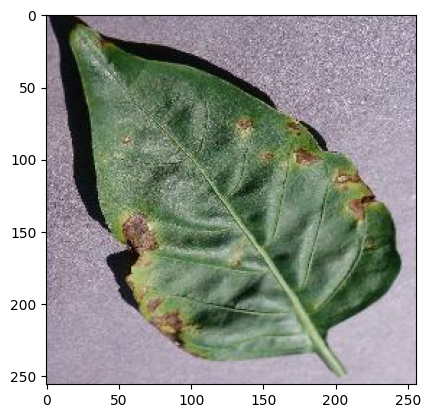

In [ ]:
for images_batch, labels_batch in test_dataset.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image prediction")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


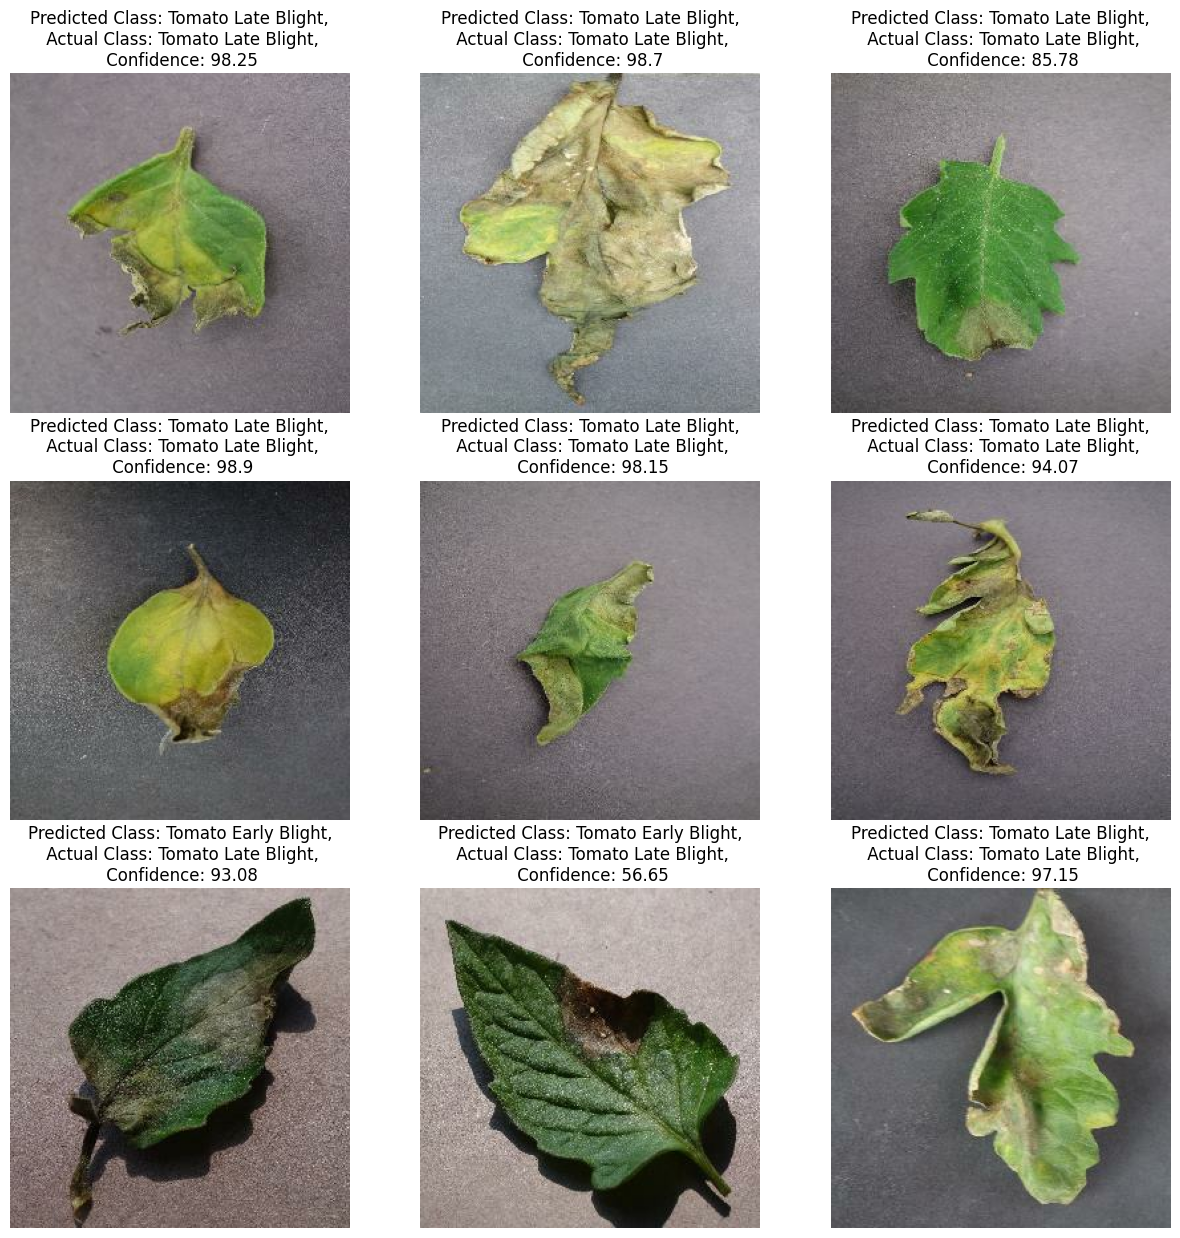

In [32]:
import numpy as np

# Shuffle the test dataset to get random images
shuffled_test_dataset = test_dataset.shuffle(buffer_size=len(test_dataset))

plt.figure(figsize=(15, 15))
for images, labels in shuffled_test_dataset.take(1):
    for i in range(min(9, len(images))):  # Display at most 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Predicted Class: {predicted_class},\n Actual Class: {actual_class},\n Confidence: {confidence}")
        plt.axis("off")

plt.show()
